In [1]:
import yfinance as yf

tickers = ['AAPL', 'MSFT', 'GOOGL','NVDA','TSLA','AMZN']
data = yf.download(tickers, start='2015-01-01', end='2024-08-07')
data.head()

[*********************100%%**********************]  6 of 6 completed


Price       Adj Close                                                      \
Ticker           AAPL     AMZN      GOOGL       MSFT      NVDA       TSLA   
Date                                                                        
2015-01-02  24.402166  15.4260  26.447147  40.305374  0.483218  14.620667   
2015-01-05  23.714724  15.1095  25.943224  39.934731  0.475057  14.006000   
2015-01-06  23.716957  14.7645  25.302961  39.348587  0.460654  14.085333   
2015-01-07  24.049520  14.9210  25.228544  39.848537  0.459453  14.063333   
2015-01-08  24.973564  15.0230  25.316446  41.020794  0.476737  14.041333   

Price           Close                                 ...       Open  \
Ticker           AAPL     AMZN      GOOGL       MSFT  ...      GOOGL   
Date                                                  ...              
2015-01-02  27.332500  15.4260  26.477501  46.759998  ...  26.629999   
2015-01-05  26.562500  15.1095  25.973000  46.330002  ...  26.357500   
2015-01-06  26.565001  14.7645  25.332001  45.650002  ...  26.025000   
2015-01-07  26.937500  14.9210  25.257500  46.230000  ...  25.547501   
2015-01-08  27.972500  15.0230  25.345501  47.590000  ...  25.075500   

Price                                         Volume                      \
Ticker           MSFT     NVDA       TSLA       AAPL      AMZN     GOOGL   
Date                                                                       
2015-01-02  46.660000  0.50325  14.858000  212818400  55664000  26480000   
2015-01-05  46.369999  0.50325  14.303333  257142000  55484000  41182000   
2015-01-06  46.380001  0.49550  14.004000  263188400  70380000  54456000   
2015-01-07  45.980000  0.48325  14.223333  160423600  52806000  46918000   
2015-01-08  46.750000  0.48400  14.187333  237458000  61768000  73054000   

Price                                      
Ticker          MSFT       NVDA      TSLA  
Date                                       
2015-01-02  27913900  113680000  71466000  
2015-01-05  39673900  197952000  80527500  
2015-01-06  36447900  197764000  93928500  
2015-01-07  29114100  321808000  44526000  
2015-01-08  29645200  283780000  51637500  

[5 rows x 36 columns]

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

returns = data['Adj Close'].pct_change().dropna()
correlation_matrix = returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix of Blue Chip Stocks')
plt.show()


ValueError: Cannot set a DataFrame with multiple columns to the single column returns

In [3]:
window = 50  # 50-day window
for ticker in tickers:
    data[f'{ticker}_MA{window}'] = data['Adj Close'][ticker].rolling(window=window).mean()
    data[f'{ticker}_Volatility{window}'] = data['Adj Close'][ticker].pct_change().rolling(window=window).std()

# Trim initial NaNs
data_trimmed = data.dropna()

In [4]:
# Fetch historical stock price data
df = yf.download(tickers, start='2015-01-01', end='2024-07-21')

# Fetch earnings dates for each ticker
earnings_dates = {}
for ticker in tickers:
    stock = yf.Ticker(ticker)
    earnings = stock.earnings_dates
    earnings_dates[ticker] = earnings.index
    print(f"{ticker} earnings dates:\n{earnings_dates[ticker]}\n")

[*********************100%%**********************]  6 of 6 completed


AAPL earnings dates:
DatetimeIndex(['2025-07-30 06:00:00-04:00', '2025-04-30 06:00:00-04:00',
               '2025-01-30 16:00:00-05:00', '2024-10-31 06:00:00-04:00',
               '2024-08-01 16:00:00-04:00', '2024-05-02 16:00:00-04:00',
               '2024-02-01 16:00:00-05:00', '2023-11-02 16:00:00-04:00',
               '2023-08-03 16:00:00-04:00', '2023-05-04 16:00:00-04:00',
               '2023-02-02 16:00:00-05:00', '2022-10-27 16:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Earnings Date', freq=None)

MSFT earnings dates:
DatetimeIndex(['2025-07-28 16:00:00-04:00', '2025-04-23 16:00:00-04:00',
               '2025-01-28 16:00:00-05:00', '2024-10-22 06:00:00-04:00',
               '2024-07-30 16:00:00-04:00', '2024-04-25 16:00:00-04:00',
               '2024-01-30 16:00:00-05:00', '2023-10-24 16:00:00-04:00',
               '2023-07-25 16:00:00-04:00', '2023-04-25 16:00:00-04:00',
               '2023-01-24 16:00:00-05:00', '2022-10-25 16:00:00

In [5]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Perform exponential smoothing and forecasting for each stock
forecast_data = {}
for ticker in tickers:
    # Fit the model with additive trend and seasonality
    model = ExponentialSmoothing(data_trimmed['Adj Close'][ticker], trend='add', seasonal='add', seasonal_periods=252)  # 252 trading days in a year
    model_fit = model.fit()
    
    # Forecast for one year (365 days)
    forecast = model_fit.forecast(steps=365)
    forecast_data[ticker] = forecast

    # Print model summary
    print(f"Model summary for {ticker}:\n{model_fit.summary()}\n")

# Display the forecast data for AAPL
print(forecast_data['AAPL'].head())



c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will res

Model summary for AAPL:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                     AAPL   No. Observations:                 2364
Model:             ExponentialSmoothing   SSE                           7946.997
Optimized:                         True   AIC                           3378.206
Trend:                         Additive   BIC                           4854.842
Seasonal:                      Additive   AICC                          3441.695
Seasonal Periods:                   252   Date:                 Thu, 08 Aug 2024
Box-Cox:                          False   Time:                         15:55:30
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.9828153                alpha                 Tru

c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Model summary for MSFT:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                     MSFT   No. Observations:                 2364
Model:             ExponentialSmoothing   SSE                          25206.764
Optimized:                         True   AIC                           6107.014
Trend:                         Additive   BIC                           7583.650
Seasonal:                      Additive   AICC                          6170.503
Seasonal Periods:                   252   Date:                 Thu, 08 Aug 2024
Box-Cox:                          False   Time:                         15:55:33
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.9157120                alpha                 Tru

c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will res

Model summary for GOOGL:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                    GOOGL   No. Observations:                 2364
Model:             ExponentialSmoothing   SSE                           5786.761
Optimized:                         True   AIC                           2628.294
Trend:                         Additive   BIC                           4104.931
Seasonal:                      Additive   AICC                          2691.783
Seasonal Periods:                   252   Date:                 Thu, 08 Aug 2024
Box-Cox:                          False   Time:                         15:55:36
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.9662237                alpha                 Tr

c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Model summary for NVDA:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                     NVDA   No. Observations:                 2364
Model:             ExponentialSmoothing   SSE                           2062.961
Optimized:                         True   AIC                            189.993
Trend:                         Additive   BIC                           1666.629
Seasonal:                      Additive   AICC                           253.481
Seasonal Periods:                   252   Date:                 Thu, 08 Aug 2024
Box-Cox:                          False   Time:                         15:55:39
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.8715088                alpha                 Tru

c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model summary for TSLA:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                     TSLA   No. Observations:                 2364
Model:             ExponentialSmoothing   SSE                          73778.985
Optimized:                         True   AIC                           8645.859
Trend:                         Additive   BIC                          10122.496
Seasonal:                      Additive   AICC                          8709.348
Seasonal Periods:                   252   Date:                 Thu, 08 Aug 2024
Box-Cox:                          False   Time:                         15:55:40
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.9762846                alpha                 Tru

c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


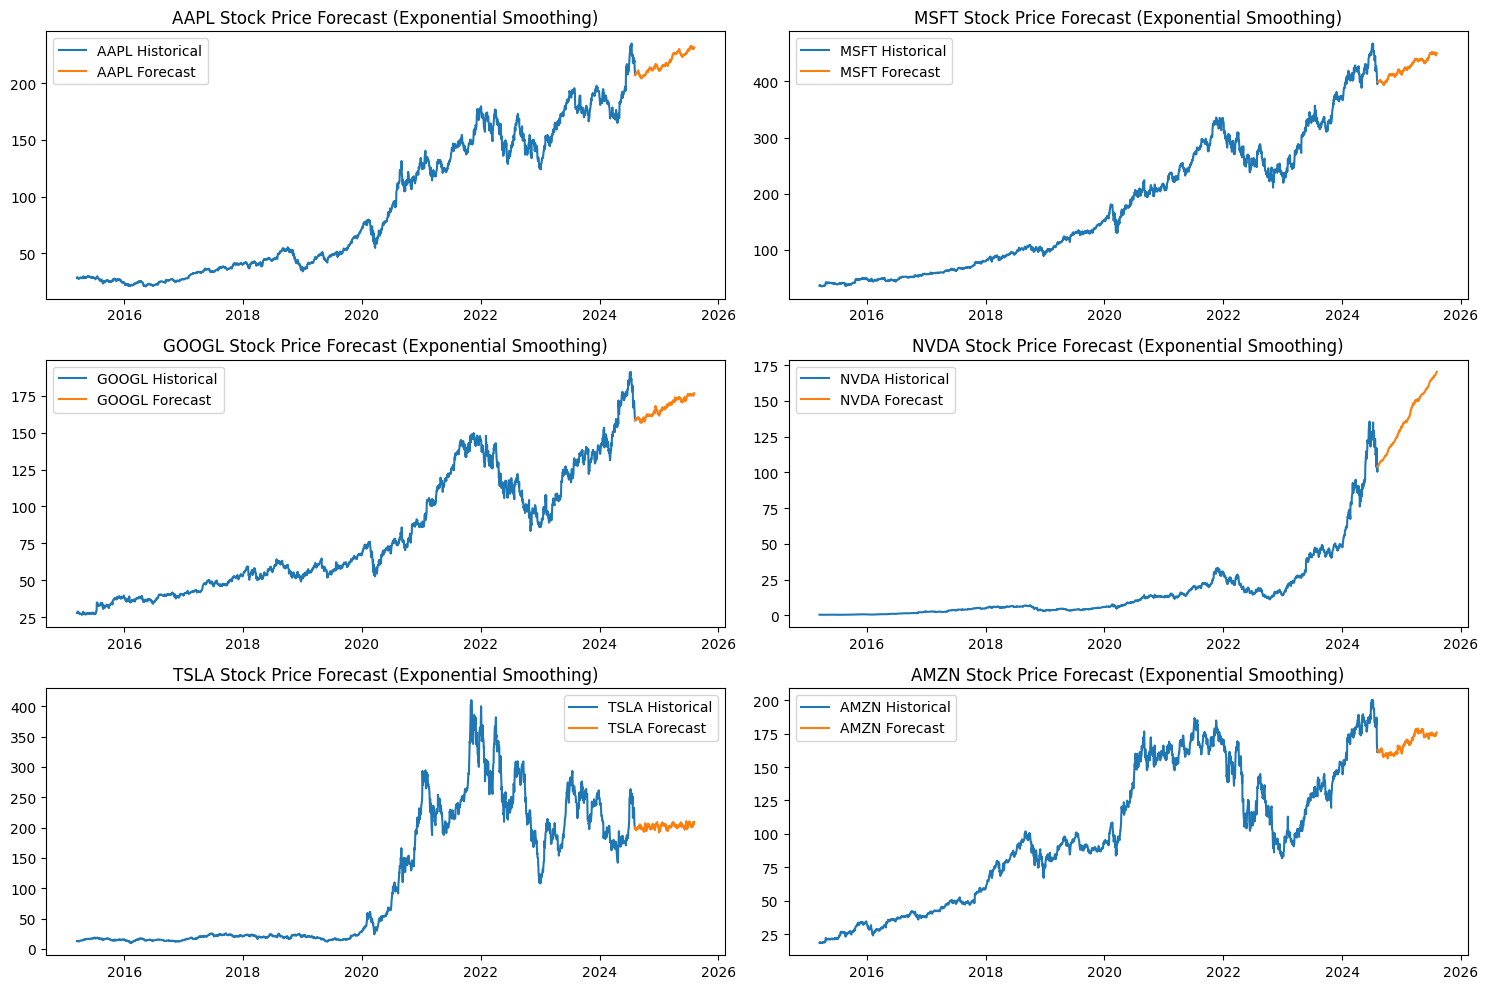

In [11]:
num_rows = 3
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()

for i, ticker in enumerate(tickers):
    axes[i].plot(data_trimmed['Adj Close'][ticker], label=f'{ticker} Historical')
    axes[i].plot(pd.date_range(start=data_trimmed.index[-1], periods=365, freq='D'), forecast_data[ticker], label=f'{ticker} Forecast')
    axes[i].set_title(f'{ticker} Stock Price Forecast (Exponential Smoothing)')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [26]:
# reset index to bring Date into the columns for the melt function
data = data.reset_index()

# melt the DataFrame to make it long format where each row is a unique combination of Date, Ticker, and attributes
data_melted = data.melt(id_vars=['Date'], var_name=['Attribute', 'Ticker'])

# pivot the melted DataFrame to have the attributes (Open, High, Low, etc.) as columns
data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='value', aggfunc='first')

# reset index to turn multi-index into columns
stock_data = data_pivoted.reset_index()

print(stock_data.head())
stock_data.set_index('Date', inplace=True)
unique_tickers = stock_data['Ticker'].unique()

Attribute       Date Ticker  AAPL_MA50  AAPL_Volatility50  AMZN_MA50  \
0         2015-01-02               NaN                NaN        NaN   
1         2015-01-02   AAPL        NaN                NaN        NaN   
2         2015-01-02   AMZN        NaN                NaN        NaN   
3         2015-01-02  GOOGL        NaN                NaN        NaN   
4         2015-01-02   MSFT        NaN                NaN        NaN   

Attribute  AMZN_Volatility50  Adj Close      Close  GOOGL_MA50  \
0                        NaN        NaN        NaN         NaN   
1                        NaN  24.402166  27.332500         NaN   
2                        NaN  15.426000  15.426000         NaN   
3                        NaN  26.447147  26.477501         NaN   
4                        NaN  40.305374  46.759998         NaN   

Attribute  GOOGL_Volatility50  ...        Low  MSFT_MA50  MSFT_Volatility50  \
0                         NaN  ...        NaN        NaN                NaN   
1           

C:\Users\Rajan\AppData\Local\Temp\ipykernel_20272\453751618.py:1: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['Daily Return'] = stock_data.groupby('Ticker')['Adj Close'].pct_change()


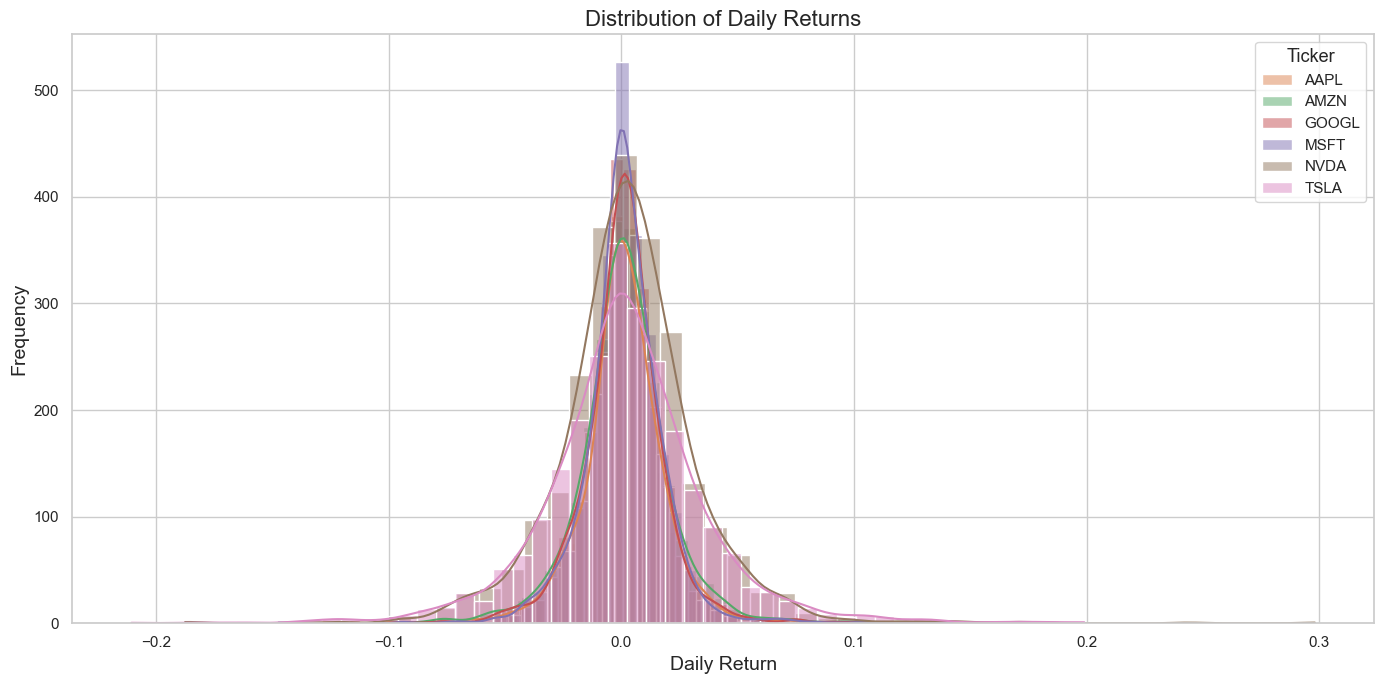

In [31]:
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Adj Close'].pct_change()

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
import numpy as np

expected_returns = returns.mean() * 252  # annualize the returns
volatility = returns.std() * np.sqrt(252)  # annualize the volatility

stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

stock_stats

,Expected Return,Volatility
Ticker,,
AAPL,0.265002,0.288137
AMZN,0.299662,0.329550
GOOGL,0.227540,0.285382
MSFT,0.277222,0.274140
NVDA,0.679196,0.487275
TSLA,0.433150,0.565437


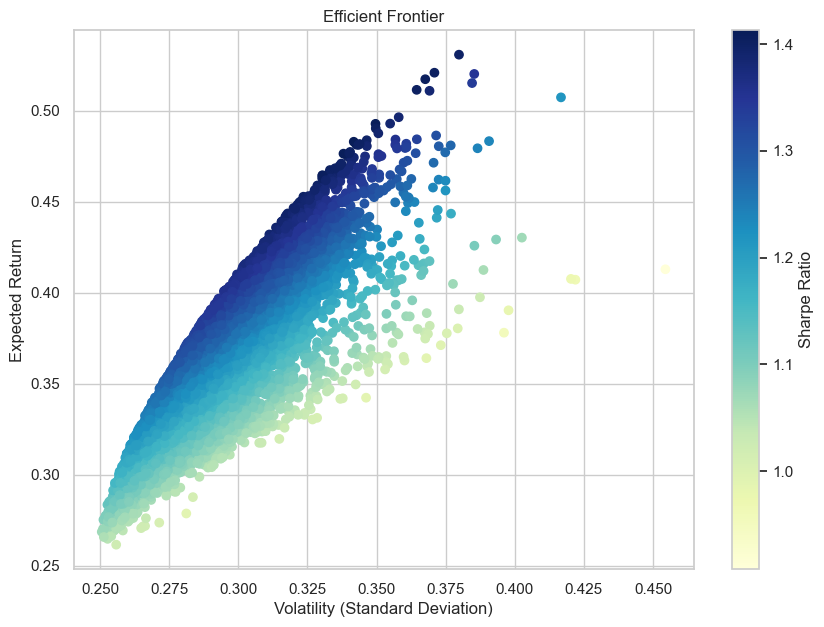

In [35]:
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# number of portfolios to simulate
num_portfolios = 10000

# arrays to store the results
results1 = np.zeros((3, num_portfolios))

# annualized covariance matrix
cov_matrix = returns.cov() * 252

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results1[0,i] = portfolio_return
    results1[1,i] = portfolio_volatility
    results1[2,i] = portfolio_return / portfolio_volatility  # Sharpe Ratio

plt.figure(figsize=(10, 7))
plt.scatter(results1[1,:], results1[0,:], c=results1[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

In [37]:
max_sharpe_idx = np.argmax(results1[2])
max_sharpe_return = results1[0, max_sharpe_idx]
max_sharpe_volatility = results1[1, max_sharpe_idx]
max_sharpe_ratio = results1[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(0.4828497305022714, 0.34174561714727303, 1.4128922399440473)

In [40]:
max_sharpe_weights = np.zeros(len(tickers))

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    if results1[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': tickers,
    'Weight': max_sharpe_weights
})

portfolio_weights_df

,Ticker,Weight
0,AAPL,0.305790
1,MSFT,0.165077
2,GOOGL,0.202118
3,NVDA,0.189620
4,TSLA,0.005937
5,AMZN,0.131459
